In [203]:
from pandas import read_csv , concat
import numpy as np
from collections import Counter
from pprint import pprint
import math
import csv
import random
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [40]:
# import the training data as chunks
dataFrame = read_csv('data/training.csv',header = None, nrows = 300)

In [190]:
def naiveBayes(traindf, testdf, validating = False, beta = 1):
    print(beta)
    
    trainingLabels = traindf.iloc[:,-1].values
    validatingLabels = testdf.iloc[:,-1].values
    validatingLabelsNames = testdf.iloc[:,0].values
    
    validatingSet = dict([list(a) for a in zip(validatingLabelsNames, validatingLabels)])
    
    totalDocuments = len(trainingLabels)
    totalValidationDocuments = len(validatingLabels)
    
    print("the length of trainningLabels is ====  " + str(totalDocuments))
    print("the length of ValidatingLabels is ====  " + str(totalValidationDocuments))
    
    traindf.drop(traindf.columns[[-1,0]],axis = 1, inplace=True)
    trainingClassCount = Counter()
    for val in trainingLabels:
        trainingClassCount[val] += 1
    
    allLabels = np.unique(trainingLabels)

    totalClassCount = len(allLabels)
    
    sortedClassCount = sorted(trainingClassCount.items())

    classCount = [y for (x,y) in sortedClassCount]
    #print(classCount)
    logPriorProb = [math.log(x/totalDocuments) for x in classCount]
    
    trainingMatrix = np.array(traindf.values)
    totalWords = len(trainingMatrix[0])
   
    dividedOnClass = [[x for x, y in zip(trainingMatrix,trainingLabels) if y == c] for c in allLabels]
    
    tempTable = [np.array(val).sum(axis=0)for val in dividedOnClass]
    
    smoother = beta if validating else 1 / totalWords
    #print(smoother)
    smoothCount = np.array(tempTable) + smoother

    totalWordInEachClass = [sum(val) for val in tempTable]
    
    totalWordInEachClassSmooth = np.array(totalWordInEachClass) + 1
    
    likelihood = np.array([ x / y for x , y in zip (smoothCount,totalWordInEachClassSmooth)])
    logLikelihood = np.array([np.log(val) for val in likelihood])
    
    
    testingDataFrame =  testdf.iloc[:, :-1]

    testingId = testingDataFrame.iloc[:,0].values
    #pprint(testingDataFrame)
    #print(testingId)
    testingDataFrame.drop(testingDataFrame.columns[0,],axis=1,inplace=True)
    
    testingVals = np.array(testingDataFrame.values)
    #print(testingVals)
    probEstimation = [logLikelihood.dot(val) for val in testingVals]

    totalProbEstimation = [[x + y for x,y in zip(logPriorProb, val)] for val in probEstimation]
    
    
    prediction = [val.index(max(val))+1 for val in totalProbEstimation]
    
    csvData = [ [docId , p]  for docId,p in zip (testingId,prediction)]
    
    return accuracy(actual = validatingSet, predicted = dict(csvData))


In [199]:
def accuracy(predicted, actual):
    totalwords = len(predicted)
    correct = 0
    
    for key in actual.keys():
        if actual.get(key) == predicted.get(key):
            correct += 1
    print("accuracy =========="+ str(correct/totalwords))
    return (correct/totalwords)

1e-08
the length of trainningLabels is ====  240
the length of ValidatingLabels is ====  60
accuracy ==========0.4166666666666667
0.0002
the length of trainningLabels is ====  240
the length of ValidatingLabels is ====  60
accuracy ==========0.4666666666666667
0.0002
the length of trainningLabels is ====  240
the length of ValidatingLabels is ====  60
accuracy ==========0.4666666666666667
0.0003
the length of trainningLabels is ====  240
the length of ValidatingLabels is ====  60
accuracy ==========0.4666666666666667
0.0005
the length of trainningLabels is ====  240
the length of ValidatingLabels is ====  60
accuracy ==========0.4666666666666667
[-0.8754687373538999, -0.7621400520468967, -0.7621400520468967, -0.7621400520468967, -0.7621400520468967]


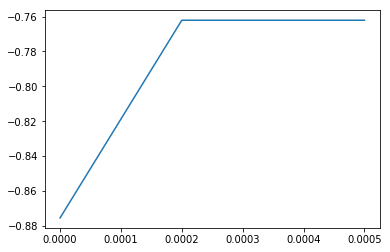

In [206]:
trainingdf, testingdf = train_test_split(dataFrame, test_size=0.2)

x = [0.00000001, 0.0002, 0.0002, 0.0003, 0.0005]
y = [naiveBayes(traindf = trainingdf.copy(), testdf= testingdf.copy(), validating = True, beta = beta) for beta in x]

y = list(map(math.log, y))
print(y)

plt.plot(x,y)
plt.show()

In [ ]:

#print(totalWords)
#print(trainingMatrix)
#print("the size of training matrix is:    "  + str(len(trainingMatrix)) + "  X  " +  str(len(trainingMatrix[0])))

In [ ]:



#pprint(dividedOnClass)
#print(len(dividedOnClass))


In [ ]:


#pprint (tempTable)

In [ ]:

#pprint(smoothCount)
#print(len(smoothCount))

In [ ]:

    

#pprint(totalWordInEachClass)

In [ ]:

#print(totalWordInEachClassSmooth)


In [ ]:

#pprint(likelihood)
#print(len(likelihood))

In [ ]:

#pprint(logLikelihood)
#print(len(logLikelihood))

In [ ]:

#pprint(logLikelihood)

In [ ]:
#testingDataFrame = read_csv('data/testing.csv', header = None)



In [ ]:


#print(testingDataFrame)


In [ ]:

#print(probEstimation)




In [ ]:

#print(totalProbEstimation)

In [ ]:

#print(prediction)

In [ ]:
csvData = [['id','class']] + csvData
with open('data/submission.csv', 'w',newline='') as csvFile:
    
    writer = csv.writer(csvFile)
    writer.writerows(csvData)

csvFile.close()

In [ ]:
import matplotlib.pyplot as plt
import math
x=list(range(-4, 4))
def function(x):
    return math.sin(x)
y= list(map(function, x))
plt.plot(x,y)
plt.show()